# Ampere's Law

We learned in our previous note that a current carrying wire produces a magnetic filed that **circulates** about the wire. Ampere's Law gives us a beautiful means of calculating the current from the circulation.

To see the practical consequences please review this <a href="https://www.youtube.com/watch?v=IMokI1iPW3g">current clamp video</a>

To articulate Ampere's Law we will need to be able to 
- parametrize curves and compute their tangent vectors
- take dot products of vectors, and
- integrate along curves

Let's start with the first. To parametrize a curve in the $(x,y)$-plane is to exhibit a pair of functions, $x(s)$ and $y(s)$,
that "describe" the curve as $s$ travels along a real interval.

For example, to describe a circle of radius $4$ centered at say $(2,3)$, I can use the pair

$$
  x(s) = 2 + 4\cos(s), \qquad y(s) = 3 + 4\sin(s), \qquad \hbox{and the interval}\qquad 0\le s\le 2\pi.
$$

We should confirm such claims in python


Text(0.5, 1.0, 'Parametrizing a Circle')

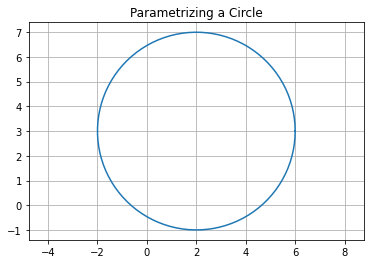

In [1]:
import numpy as np
import matplotlib.pyplot as plt

s = np.linspace(0,2*np.pi,100)
x = 2 + 4*np.cos(s)
y = 3 + 4*np.sin(s)
plt.plot(x,y)
plt.grid('on')
plt.axis('equal')
plt.title('Parametrizing a Circle')

Parametrizing a square requires a piece-wise approach

$$
  \eqalign{
  x(s) &= s, \quad y(s) = -1, \quad -1\le s\le 1 \cr
  x(s) &= 1, \quad y(s) = s-2, \quad 1 \le s \le 3 \cr
  x(s) &= 4-s, \quad y(s) = 1, \quad 3 \le s \le 5 \cr
  x(s) &= -1, \quad y(s) = 6-s, \quad 5\le s \le 7. \cr}
$$

Text(0.5, 1.0, 'Parametrizing a Square')

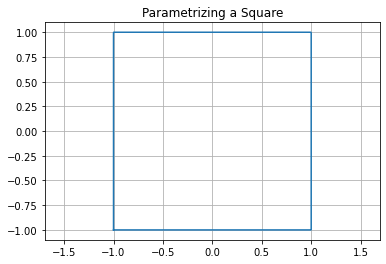

In [4]:
s = np.linspace(-1,7,1000)
x = np.zeros(1000,)
y = np.zeros(1000,)

for i in range(1000):
    if ( s[i] < 1 ):
        x[i] = s[i]
        y[i] = -1
    elif ( s[i] < 3 ):
        x[i] = 1
        y[i] = s[i]-2
    elif ( s[i] < 5 ):
        x[i] = 4 - s[i]
        y[i] = 1
    else:
        x[i] = -1
        y[i] = 6 - s[i]
        
plt.plot(x,y)
plt.grid('on')
plt.axis('equal')
plt.title('Parametrizing a Square')
        

The unit tangent vector to a curve at tells us which way the curve is going. In particular

$$
  \boxed{\vec t(s) \equiv \frac{(x'(s),y'(s))}{\sqrt{(x'(s))^2+(y'(s))^2}}} \tag{TV}
$$

For example, for our circle we find

$$
  \vec t(s) \equiv (-\sin(s),\cos(s))
$$

while for the square

$$
  \eqalign{
  \vec t(s) = (1,0)  \quad -1\le s\le 1 \cr
  \vec t(s) = (0,1) \quad 1 \le s \le 3 \cr
  \vec t(s) = (-1,0) \quad 3 \le s \le 5 \cr
  \vec t(s) = (0,-1) \quad 5\le s \le 7. \cr}
$$

I believe that you can see these vectors on the square. To see them on the circle we return to python

Text(0.5, 1.0, 'Tangent Vectors to the Circle')

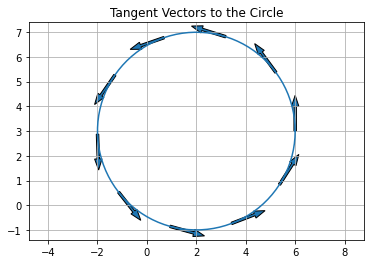

In [16]:
s = np.linspace(0,2*np.pi,100)
x = 2 + 4*np.cos(s)
y = 3 + 4*np.sin(s)
plt.plot(x,y)

for n in range(10):  # 10 increments of 10
    N = 10*n
    tx = -np.sin(s[N])
    ty = np.cos(s[N])
    plt.arrow(x[N], y[N], tx, ty, width = 0.1)
    
plt.grid('on')
plt.axis('equal')
plt.title('Tangent Vectors to the Circle')

The next concept we need is the **dot product** of two vectors

$$
  \boxed{\vec a \cdot \vec b = (a_x,a_y)\cdot(b_x,b_y) \equiv a_xb_x + a_yb_y}  \tag{DP}
$$

Examples come readily

$$
  (1,1)\cdot(1,-1) = 0, \quad
  (1,1)\cdot(1,0) = 1, \quad
  (1,1)\cdot(0,1) = 1, \quad
  (1,1)\cdot(1,1) = 2, ...
$$

Numbers are fine but they hide the geometry. The key insight is that

$$
   \boxed{\vec a \cdot \vec b = \|\vec a\|\|\vec b\|\cos(\theta)} \tag{DP2}
$$

where $\|a\|=\sqrt{\vec a\cdot\vec a}$ is the length of $\vec a$,
$\|b\|=\sqrt{\vec b\cdot\vec b}$  is the length of $\vec b$, 
and $\theta$ is the angle between $\vec a$ and $\vec b$.

With this interpretation, we "see" that the dot product is zero when the vectors are perpendicular to each other, i.e., when
the angle between them is 90 degrees. Do you see that $(1,1)$ is perpendicular to $(1,-1)$.

With these concepts we can now define the **Circulation** of the $B$-field around a closed curve 

$$
  C = \{(x(s),y(s)):a\le s\le b\}
$$

to be

$$
  \oint_C \vec B\cdot\vec t = \int_a^b \vec B(x(s),y(s)) \cdot (x'(s),y'(s))\,ds
$$

and proceed to state 

### Ampere's Law
The Circulation of $\vec B$ around a curve $C$ is proportional to the sum of the currents "enclosed" by $C$. 


The use of "sum" here corresponds to the warning in our current clamp video to limit yourself to one wire. For example, as current flows in opposite directions along the wires lighting a lamp, the sum of their currents would vanish.



### Homework 9.

1. Express the parametric functions of the triangle with vertices (0,0), (1,0) and (1,1), and draw (in python) the triangle using your parametric functions. Also draw (in python) one tangent vector at the center of each side.

2. (a) Find a vector perpendicular to (1,2). (b) Find a vector perpendicular to (-1,2). (c) Find a vector perpendicular to (x,y).

3. Work exercise 41, 42, and 43 in chapter 12 of our text. Carefully explain your reasoning in each case.